<a href="https://colab.research.google.com/github/MohammedQaraad/model-PCC-DTCV-/blob/main/paper_two_last8_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import csv
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import random
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from collections import Counter
import tarfile
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from numpy import interp
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
# Metrics
from sklearn.metrics import average_precision_score, roc_auc_score, mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc

random_s = np.random.RandomState(0)



Mounted at /content/drive


# *unpruning  Decsion Tree *

west
(49, 1)
number of selected Genes  :  28
west AUC = 0.86 SenStd = 0.08 
west Sen = 0.85 SenStd = 0.19 
west Spe = 0.87 SenStd = 0.16 
Accuracy = 0.84 SenStd = 0.08 
----------------------Classification Report---------------------- 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.83      0.83      0.83        24

    accuracy                           0.84        49
   macro avg       0.84      0.84      0.84        49
weighted avg       0.84      0.84      0.84        49



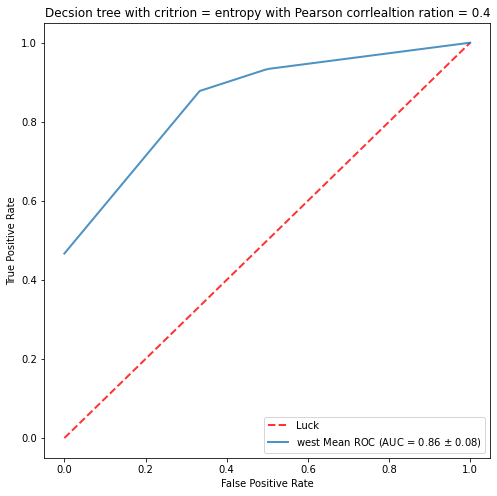

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
# data_set_name=['chin.tar.gz','alon.tar.gz','chowdary.tar.gz','golub.tar.gz','gordon.tar.gz',
#                'singh.tar.gz','west.tar.gz']
# ,'choewdary.tar.gz','golub.tar.gz','gordon.tar.gz'+
data_set_name=['west.tar.gz']
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)    
corrlation_ratio=0.4
for i in data_set_name:
  d= i.split('.')[0]
  print(d)
  file='/content/drive/My Drive/Colab Notebooks/data/'+i
  datasetname=d

  min_max_scaler = MinMaxScaler()
  with tarfile.open(file, "r:*") as tar:
    csv_path = tar.getnames()
    if(d == 'singh' or d == 'west'):
      labels = pd.read_csv(tar.extractfile(csv_path[1]), header=None)
      feature = pd.read_csv(tar.extractfile(csv_path[0]), header=None)

    else:
      labels = pd.read_csv(tar.extractfile(csv_path[0]), header=None)
      feature = pd.read_csv(tar.extractfile(csv_path[1]), header=None)
  
  
  #applied Pearson 
  
	#Convert labels from 1 2  to 1 0 
  lab=labels - 1
  print(lab.shape)
  data= feature
  #adding target label to data frame 
  data['target'] = lab.values
  cor = data.corr(method='pearson')
  #Correlation with output variable
  cor_target = abs(cor["target"])
  #Selecting highly correlated features
  relevant_features = cor_target[cor_target>=corrlation_ratio]
  
  s= relevant_features.index
  s= s.drop('target')
  gains = np.asarray(s)
  indexes = np.where(gains != 0)[0]
  feature = feature[s]
  print("number of selected Genes  : ", feature.shape[1])
  
  

  headers = list(feature.columns)
  features = np.asarray(feature.values)
  features = sc_X.fit_transform(feature)
  labels = np.transpose(np.asarray(labels.values.ravel() - 1, dtype=int))
  
  
  

  NoRun=1
  cv = StratifiedKFold(n_splits=10,shuffle=False)
  fold_N=0
  max_fold=10

  Accuracy=np.zeros((max_fold))
  Precision=np.zeros((max_fold))
  Recall=np.zeros((max_fold))
  TP=[]
  FP=[]
  TN=[]
  FN=[]

  Specificity = np.zeros((max_fold))
  Sensitifity = np.zeros((max_fold))
  AUC = np.zeros((max_fold))
  Accuracy= np.zeros((max_fold))
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  
  for r in range(0,NoRun):
    fold_N=0
    i=0
    for train_index, test_index in cv.split(features,labels):
      #Data Partition 
      X_train, X_test =  features[train_index], features[test_index]
      y_train, y_test = labels[train_index], labels[test_index]
      #x_train, x_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size = 0.11)
      # xtrain = X_train[:, indexes]
      # xtest = X_test[:, indexes]
      # print('X_train features', X_train.shape)
      #evaluate Fintness Function 
      svclassifier = DecisionTreeClassifier(random_state= 1200, criterion='entropy')
      #svclassifier = SVC(kernel='rbf',verbose=0, random_state=random_s) 
      svclassifier.fit(X_train, y_train)
      # ypred = svclassifier.predict(x_validation)
      # ValidationError=sum(ypred==y_validation)*100/y_validation.shape[0]
      # print('training accuracy ' , svclassifier.score(X_train, y_train))
      s= svclassifier.feature_importances_
      s.shape
      indx= np.where(s != 0)
      # print('Importance Genes : ')
      # print(s[indx], indx)
  
      # print('fold_N = ', fold_N , ' Best value of C= ', gBestPos[0],'  Best value of Sigma=',gBestPos[1],  'fmin= ', gBestValue) 
      # ResultsValidation[r][fold_N]=gBestValue
      # fold_best_postion[fold_N]= gBestPos

      # svclassifier = SVC(kernel='rbf', gamma = gBestPos[1], C = gBestPos[0] ,verbose=0, random_state=random_s)
      # svclassifier.fit(x_train, y_train)
      ypred = svclassifier.predict(X_test)
    
      fpr, tpr, t = roc_curve(y_test, ypred)
      #print('fpr ',fpr) 
      #print('tpr',tpr)
      tprs.append(interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      #plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1
      conf_matrix = confusion_matrix(y_test, ypred)
    
      
      sensitivity_s = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])

      Sensitifity[fold_N]=sensitivity_s
      
      specificity_s = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])

      Specificity[fold_N]=specificity_s
      acc = accuracy_score(y_test, ypred)
      Accuracy[fold_N]= acc
      
      AUC[fold_N]=roc_auc
    
      #calculate Error ratio 
      TestingError=sum(ypred==y_test)*100/y_test.shape[0]
      #ResultsTestingAcc[r][fold_N]=100-TestingError;
      #SV[r]= svclassifier.n_support_
      #print('fold_N testing error ', 100-TestingError)
      fold_N = fold_N +1
  
    print (d, "AUC = %.2f SenStd = %.2f " % (AUC.mean(), AUC.std()))
    print (d, "Sen = %.2f SenStd = %.2f " % (Sensitifity.mean(), Sensitifity.std()))
    print (d, "Spe = %.2f SenStd = %.2f " % (Specificity.mean(), Specificity.std()))
    print ("Accuracy = %.2f SenStd = %.2f " % (Accuracy.mean(), Accuracy.std()))
    print("----------------------Classification Report---------------------- ")
    
    y_pred_selected = cross_val_predict(svclassifier, features, labels, cv=10)
    # conf_mat = confusion_matrix(labels, y_pred_selected)
    # conf_mat
    # fig = sns.heatmap(conf_mat,annot=True,fmt="d")
      
    print(classification_report(labels, y_pred_selected))




    # print('AUC' ,AUC)
    # print('Sensitifity', Sensitifity)
    # print('Specificity' ,Specificity)
    # print (d, "AUC = %.5f SenStd = %.2f " % (AUC.mean(), AUC.std()))
    # print (d, "Sen = %.5f SenStd = %.2f " % (Sensitifity.mean(), Sensitifity.std()))
    # print (d, "Spe = %.5f SenStd = %.2f " % (Specificity.mean(), Specificity.std()))
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr,
             label=d +' Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)



    # std_tpr = np.std(tprs, axis=0)
    # tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    # tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    # plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
    #                  label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decsion tree with critrion = entropy with Pearson corrlealtion ration = '+str(corrlation_ratio))
plt.legend(loc="lower right")
plt.show()


# Optime Tree Depth with GridSreach

west
(49, 1)
west AUC = 0.86 SenStd = 0.08 
west Sen = 0.85 SenStd = 0.19 
west Spe = 0.87 SenStd = 0.16 
Accuracy = 0.84 SenStd = 0.08 
----------------------Classification Report---------------------- 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.88      0.88      0.88        24

    accuracy                           0.88        49
   macro avg       0.88      0.88      0.88        49
weighted avg       0.88      0.88      0.88        49



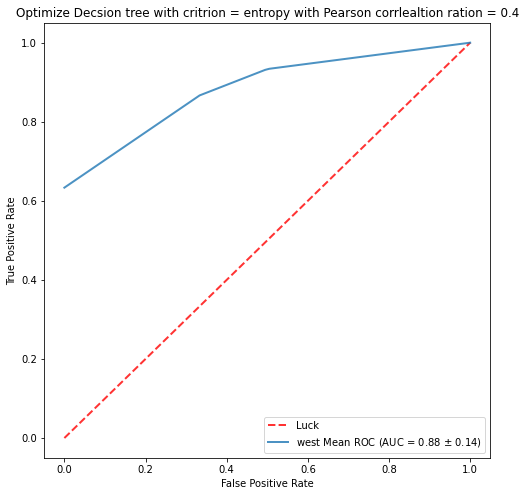

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
# data_set_name=['chin.tar.gz','alon.tar.gz','chowdary.tar.gz','golub.tar.gz','gordon.tar.gz',
#                'singh.tar.gz','west.tar.gz']
# ,'choewdary.tar.gz','golub.tar.gz','gordon.tar.gz'+
data_set_name=['west.tar.gz']
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)    
corrlation_ratio = 0.4
for i in data_set_name:
  d= i.split('.')[0]
  print(d)
  file='/content/drive/My Drive/Colab Notebooks/data/'+i
  datasetname=d

  min_max_scaler = MinMaxScaler()
  with tarfile.open(file, "r:*") as tar:
    csv_path = tar.getnames()
    if(d == 'singh' or d == 'west'):
      labels = pd.read_csv(tar.extractfile(csv_path[1]), header=None)
      feature = pd.read_csv(tar.extractfile(csv_path[0]), header=None)

    else:
      labels = pd.read_csv(tar.extractfile(csv_path[0]), header=None)
      feature = pd.read_csv(tar.extractfile(csv_path[1]), header=None)
  
  
  #applied Pearson 
  
	#Convert labels from 1 2  to 1 0 
  lab=labels - 1
  print(lab.shape)
  data= feature
  #adding target label to data frame 
  data['target'] = lab.values
  cor = data.corr(method='pearson')
  #Correlation with output variable
  cor_target = abs(cor["target"])
  #Selecting highly correlated features
  relevant_features = cor_target[cor_target>=corrlation_ratio]
  relevant_features
  s= relevant_features.index
  s= s.drop('target')
  gains = np.asarray(s)
  indexes = np.where(gains != 0)[0]
  feature = feature[s]

  
  

  headers = list(feature.columns)
  features = np.asarray(feature.values)
  features = sc_X.fit_transform(feature)
  labels = np.transpose(np.asarray(labels.values.ravel() - 1, dtype=int))
  
  
  

  NoRun=1
  cv = StratifiedKFold(n_splits=10,shuffle=False)
  fold_N=0
  max_fold=10

  Accuracy1=np.zeros((max_fold))
  Precision=np.zeros((max_fold))
  Recall=np.zeros((max_fold))
  TP=[]
  FP=[]
  TN=[]
  FN=[]

  Specificity1 = np.zeros((max_fold))
  Sensitifity1 = np.zeros((max_fold))
  AUC1 = np.zeros((max_fold))

  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  
  for r in range(0,NoRun):
    fold_N=0
    i=0
    for train_index, test_index in cv.split(features,labels):
      #Data Partition 
      X_train, X_test =  features[train_index], features[test_index]
      y_train, y_test = labels[train_index], labels[test_index]
      #x_train, x_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size = 0.11)
      # xtrain = X_train[:, indexes]
      # xtest = X_test[:, indexes]
      # print('X_train features', X_train.shape)
      #evaluate Fintness Function 
      svclassifier = DecisionTreeClassifier(random_state= 1200, criterion='entropy')
      depth=list(np.arange(3, 25))
      parameter_grid=[{'max_depth':depth}]
      clf = GridSearchCV(svclassifier, parameter_grid,n_jobs=-1)
      clf.fit(X_train, y_train)
	    # svclassifier = DecisionTreeClassifier(max_depth=clf.best_estimator_.max_depth,random_state= random_s, criterion='entropy')
      # ResultsValidation[r][fold_N]=gBestValue
      # fold_best_postion[fold_N]= gBestPos
      # print('fold_N = ', fold_N ,' Best value of max_depth= ', clf.best_estimator_.max_depth) 

      svclassifier = DecisionTreeClassifier(max_depth=clf.best_estimator_.max_depth,random_state= random_s)
      svclassifier.fit(X_train, y_train)
      # print('training accuracy ' , svclassifier.score(X_train, y_train))
      s= svclassifier.feature_importances_
      s.shape
      indx= np.where(s != 0)
      # print('Importance Genes : ')
      # print(s[indx], indx)
  
      # print('fold_N = ', fold_N , ' Best value of C= ', gBestPos[0],'  Best value of Sigma=',gBestPos[1],  'fmin= ', gBestValue) 
      # ResultsValidation[r][fold_N]=gBestValue
      # fold_best_postion[fold_N]= gBestPos

      # svclassifier = SVC(kernel='rbf', gamma = gBestPos[1], C = gBestPos[0] ,verbose=0, random_state=random_s)
      # svclassifier.fit(x_train, y_train)
      ypred = svclassifier.predict(X_test)
    
      fpr, tpr, t = roc_curve(y_test, ypred)
      #print('fpr ',fpr) 
      #print('tpr',tpr)
      tprs.append(interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      #plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1
      conf_matrix = confusion_matrix(y_test, ypred)
    
      
      sensitivity_e = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])

      Sensitifity1[fold_N]=sensitivity_e
      
      specificity_e = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])

      Specificity1[fold_N]=specificity_e
      acc = accuracy_score(y_test, ypred)
      Accuracy1[fold_N]= acc
      
      AUC1[fold_N]=roc_auc
    
      #calculate Error ratio 
      TestingError=sum(ypred==y_test)*100/y_test.shape[0]
      #ResultsTestingAcc[r][fold_N]=100-TestingError;
      #SV[r]= svclassifier.n_support_
      #print('fold_N testing error ', 100-TestingError)
      fold_N = fold_N +1

    
    print (d, "AUC = %.2f SenStd = %.2f " % (AUC.mean(), AUC.std()))
    print (d, "Sen = %.2f SenStd = %.2f " % (Sensitifity.mean(), Sensitifity.std()))
    print (d, "Spe = %.2f SenStd = %.2f " % (Specificity.mean(), Specificity.std()))
    print ("Accuracy = %.2f SenStd = %.2f " % (Accuracy.mean(), Accuracy.std()))
    # print('AUC' ,AUC)
    # print('Sensitifity', Sensitifity)
    # print('Specificity' ,Specificity)
    # print (d, "AUC = %.5f SenStd = %.2f " % (AUC.mean(), AUC.std()))
    # print (d, "Sen = %.5f SenStd = %.2f " % (Sensitifity.mean(), Sensitifity.std()))
    # print (d, "Spe = %.5f SenStd = %.2f " % (Specificity.mean(), Specificity.std()))
    print("----------------------Classification Report---------------------- ")
    y_pred_selected = cross_val_predict(svclassifier, features, labels, cv=10)
    # conf_mat = confusion_matrix(labels, y_pred_selected)
    # conf_mat
    # fig = sns.heatmap(conf_mat,annot=True,fmt="d")
      
    print(classification_report(labels, y_pred_selected))
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr,
             label=d +' Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)



    # std_tpr = np.std(tprs, axis=0)
    # tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    # tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    # plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
    #                  label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Optimize Decsion tree with critrion = entropy with Pearson corrlealtion ration = '+str(corrlation_ratio))
plt.legend(loc="lower right")
plt.show()
  




